# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_lenght'] = df['title'].str.len()
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_lenght
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [5]:
# Calcula media, mediana y moda de la columna 'title_length'

# Media

media = df['title_lenght'].mean()

# Mediana

mediana = df['title_lenght'].median()

# Moda

moda = df['title_lenght'].mode()[0]

print(f'La media es: {media}\nLa mediana es: {mediana}\nY la moda es: {moda}')

La media es: 15.481103166496425
La mediana es: 14.0
Y la moda es: 12


In [6]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

# Rango

min = df['title_lenght'].min()
max = df['title_lenght'].max()

rango = max - min

# Varianza

varianza = df['title_lenght'].var()

# Desviación estandar

desv = df['title_lenght'].std()

print(f'El rango es: {rango}\nLa varianza es: {varianza}\nY la desviación estandar es: {desv}')

El rango es: 67
La varianza es: 72.1067488840288
Y la desviación estandar es: 8.491569282766807


In [12]:
# Calcula asimetría y curtosis de la columna 'title_length'

simetría = df['title_lenght'].skew()

curtosis = df['title_lenght'].kurt()

print(f'La simetría es: {simetría}, esto quiere decir que es asimetría positiva\nY la curtosis es: {curtosis}, en la teoría esto representa una curtósis leptocúrtica.')

La simetría es: 1.5252523464631278, esto quiere decir que es asimetría positiva
Y la curtosis es: 3.8122887061291544, en la teoría esto representa una curtósis leptocúrtica.


In [20]:
# Imprime el título más corto y el título más largo según su longitud

# Título más corto

id_corto = df['title_lenght'].idxmin()

t_corto = df['title'].loc[id_corto]

# Título más largo

id_largo = df['title_lenght'].idxmax()

t_largo = df['title'].loc[id_largo]

print(f'El título más corto es: {t_corto}\nY el título más largo es: {t_largo}')

El título más corto es: M
Y el título más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


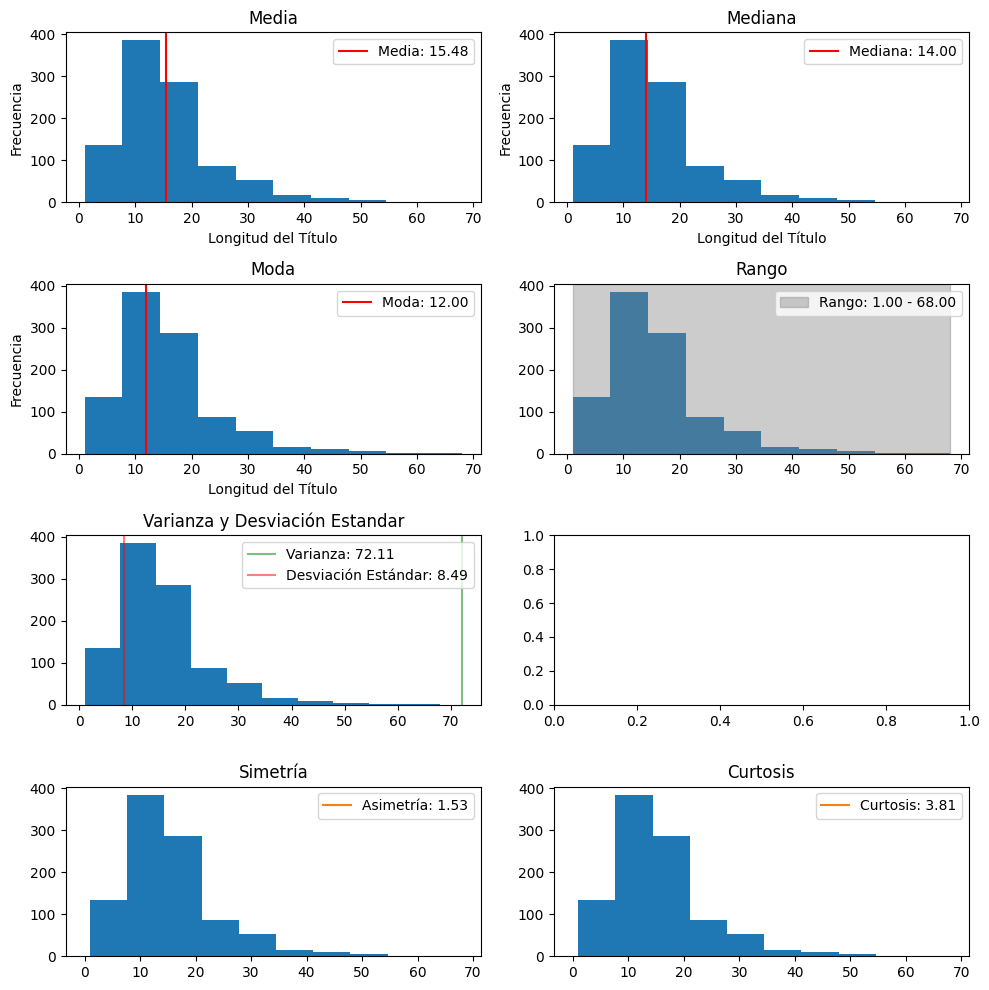

In [61]:
# grafica tus resultados

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

# Media

ax[0,0].hist(df['title_lenght'])
ax[0,0].axvline(media, color='r', label=f'Media: {media:.2f}')
ax[0,0].legend()
ax[0,0].set_title("Media")
ax[0,0].set_xlabel('Longitud del Título')
ax[0,0].set_ylabel('Frecuencia')

# Mediana

ax[0,1].hist(df['title_lenght'])
ax[0,1].axvline(mediana, color='r', label=f'Mediana: {mediana:.2f}')
ax[0,1].legend()
ax[0,1].set_title("Mediana")
ax[0,1].set_xlabel('Longitud del Título')
ax[0,1].set_ylabel('Frecuencia')

# Moda

ax[1,0].hist(df['title_lenght'])
ax[1,0].axvline(moda, color='r', label=f'Moda: {moda:.2f}')
ax[1,0].legend()
ax[1,0].set_title("Moda")
ax[1,0].set_xlabel('Longitud del Título')
ax[1,0].set_ylabel('Frecuencia')

# Rango

ax[1,1].hist(df['title_lenght'])
ax[1,1].axvspan(min, max, color='gray', alpha=0.4 ,label=f'Rango: {min:.2f} - {max:.2f}')
ax[1,1].legend()
ax[1,1].set_title("Rango")

# La varianza y la desviación estandar son una medida de dispersión, entonces está bien solo mostrar su valor con respecto a la gráfica

ax[2,0].hist(df['title_lenght'])
ax[2,0].axvline(varianza, color='g', alpha=0.5, label=f'Varianza: {varianza:.2f}')
ax[2,0].axvline(desv, color='r', alpha=0.5, label=f'Desviación Estándar: {desv:.2f}')
ax[2,0].legend()
ax[2,0].set_title("Varianza y Desviación Estandar")


# Simetría

ax[3,0].hist(df['title_lenght'])
ax[3,0].plot(simetría, label=f'Asimetría: {simetría:.2f}')
ax[3,0].legend()
ax[3,0].set_title("Simetría")

# Curtósis

ax[3,1].hist(df['title_lenght'])
ax[3,1].plot(curtosis, label=f'Curtosis: {curtosis:.2f}')
ax[3,1].legend()
ax[3,1].set_title("Curtosis")

plt.tight_layout()
plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [ ]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

indices = [0, 5, 10, 15, 20]

titulos_manuales = df['title_lenght'].iloc[indices].tolist()

[24, 12, 49, 12, 10]


In [65]:
# Calcula la media de los 5 valores

suma = sum(titulos_manuales)

media_t_manuales = suma / len(titulos_manuales)

print(media_t_manuales)

21.4


In [66]:
# Calcula las diferencias al cuadrado con respecto a la media

diferencias_al_cuadrado = [(x - media_t_manuales) ** 2 for x in titulos_manuales]

print(diferencias_al_cuadrado)

[6.760000000000008, 88.35999999999997, 761.7600000000001, 88.35999999999997, 129.95999999999998]


In [ ]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

# Varianza

suma_dif_cuadrado = sum(diferencias_al_cuadrado)

varianza = suma_dif_cuadrado / (len(diferencias_al_cuadrado) - 1)

# Desviación estandar

desv = varianza ** 0.5

print(f'La varianza es: {varianza}\nY la desviación estandar es: {desv}')

La varianza es: 215.04000000000002
Y la desviación estandar es: 14.66424222385869
